# Model Objective

**The ‘Facebook Live Sellers in Thailand’ is a dataset present in UCI Machine Learning Datasets. The 
data includes 7050 observations and twelve attributes. The data is about the live selling attribute o 
the Facebook platform. Each record consists of details about the time live details of the sale a e
published to Facebook and engagements in the data. The engagements are regular Faceb ok
dealings such as sharing and emreactionst**ion.

**Live Shopping on Facebook is an interactive way to sell items, connect straight with viewers, and
gain likely customers, all in real-time. When you sell products through Live Shopping on Facebook,
you are live streaming as you feature and demonstrate your products. Small vendors can now reach
a more expansive audience and connect with many clients. You need to implement K-Means
clustering to find intrinsic batches within the dataset that depict the same status_type behavior. The
status_type behavior variable consists of posts of a distinct nature (video, photos, statuses, and
l**inks)..

## Importing Preliminary Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset 

In [8]:
df = pd.read_csv("Live.csv")

In [10]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## Attribute information

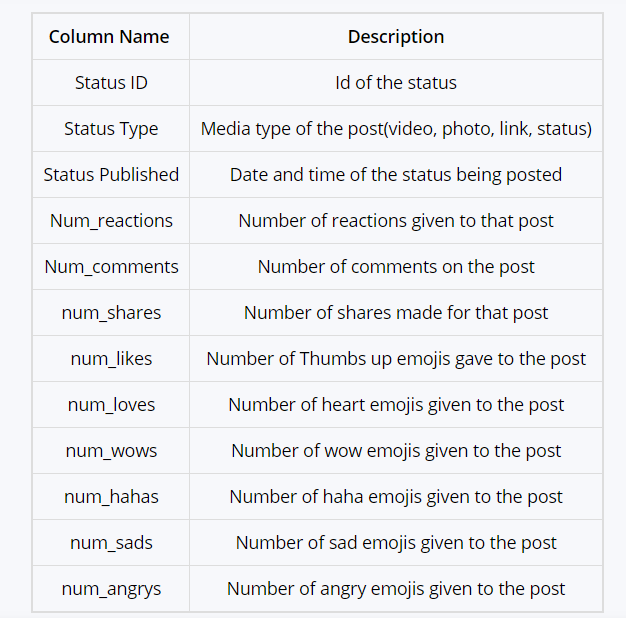

## General Observation 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

## Data Cleaning

**We can observe that Column1, Column2, Column3 and Column4 have no values, so we can drop these columns**

In [19]:
df.drop(["Column1", "Column2", "Column3", "Column4"], axis=1, inplace=True)

**We can split the status_published column into date and time columns**

In [22]:
df[["date", "time"]] = df["status_published"].str.split(" ", expand=True)

In [24]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,4/22/2018,6:00
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,4/21/2018,22:45
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,4/21/2018,6:17
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,4/21/2018,2:29
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,4/18/2018,3:22


**We can convert the date column from object dtype to date_time format**

In [27]:
df["date"] = pd.to_datetime(df["date"])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   object        
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  date              7050 non-null   datetime64[ns]
 13  time              7050 non-null   object        
dtypes: datetime64[ns](1), in

**We need the time column in numerical format. We will split the time column at ":" into hours and minutes columns.**

**We will measure time as minutes after midnight. So we will create a new column where we multiply the hour column by 60 and add the minute column to it** 

In [32]:
df[["hours", "minutes"]] = df["time"].str.split(":", expand=True)

In [34]:
df.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time,hours,minutes
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2018-04-22,6:00,6,00
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,2018-04-21,22:45,22,45


In [36]:
df["time1"] = df["hours"]*60 + df["minutes"]

In [38]:
df.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time,hours,minutes,time1
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2018-04-22,6:00,6,00,6666666666666666666666666666666666666666666666...
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,2018-04-21,22:45,22,45,2222222222222222222222222222222222222222222222...


In [40]:
df["hours"].dtype

dtype('O')

In [42]:
#so, here, we have to first convert the hours and minutes into numerical columns

In [44]:
df["hours"] = pd.to_numeric(df["hours"])

In [46]:
df["minutes"] = pd.to_numeric(df["minutes"])

In [48]:
df.drop("time1", axis=1, inplace=True)

In [50]:
# We can also drop the columns status_published and time

In [52]:
df.drop(["status_published", "time"], axis=1, inplace=True)

In [54]:
df.head(2)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,hours,minutes
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018-04-22,6,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018-04-21,22,45


In [56]:
df["time"] = df["hours"]*60 + df["minutes"]

In [58]:
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,hours,minutes,time
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018-04-22,6,0,360
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018-04-21,22,45,1365
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,2018-04-21,6,17,377
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,2018-04-21,2,29,149
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,2018-04-18,3,22,202


In [60]:
df.drop(["hours", "minutes"], axis=1, inplace=True)

In [62]:
df.head(2)

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018-04-22,360
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018-04-21,1365


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   status_id      7050 non-null   object        
 1   status_type    7050 non-null   object        
 2   num_reactions  7050 non-null   int64         
 3   num_comments   7050 non-null   int64         
 4   num_shares     7050 non-null   int64         
 5   num_likes      7050 non-null   int64         
 6   num_loves      7050 non-null   int64         
 7   num_wows       7050 non-null   int64         
 8   num_hahas      7050 non-null   int64         
 9   num_sads       7050 non-null   int64         
 10  num_angrys     7050 non-null   int64         
 11  date           7050 non-null   datetime64[ns]
 12  time           7050 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 716.1+ KB


## Exploratory Data Analysis

In [67]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
num_reactions,7050.0,230.117163,0.0,17.0,59.5,219.0,4710.0,462.625309
num_comments,7050.0,224.356028,0.0,0.0,4.0,23.0,20990.0,889.63682
num_shares,7050.0,40.022553,0.0,0.0,0.0,4.0,3424.0,131.599965
num_likes,7050.0,215.043121,0.0,17.0,58.0,184.75,4710.0,449.472357
num_loves,7050.0,12.728652,0.0,0.0,0.0,3.0,657.0,39.97293
num_wows,7050.0,1.289362,0.0,0.0,0.0,0.0,278.0,8.71965
num_hahas,7050.0,0.696454,0.0,0.0,0.0,0.0,157.0,3.957183
num_sads,7050.0,0.243688,0.0,0.0,0.0,0.0,51.0,1.597156
num_angrys,7050.0,0.113191,0.0,0.0,0.0,0.0,31.0,0.726812
date,7050,2016-11-19 20:56:34.723404032,2012-07-15 00:00:00,2016-03-15 06:00:00,2017-11-18 00:00:00,2018-03-09 00:00:00,2018-06-13 00:00:00,NaN


In [69]:
len(df[df["num_angrys"]>10])

4

In [71]:
len(df[df["num_sads"]>10])

21

In [73]:
df["status_type"].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

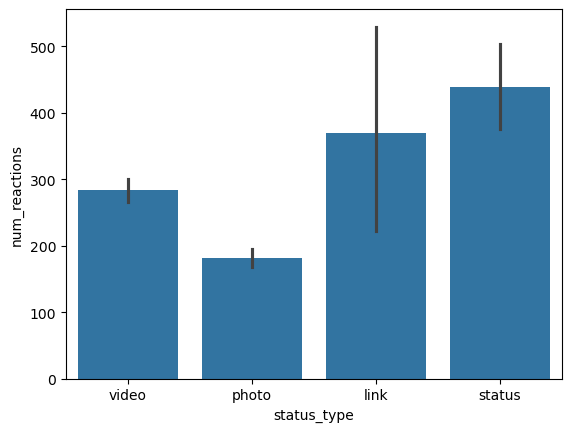

In [75]:
sns.barplot(x="status_type", y="num_reactions", data=df)
plt.show()

In [46]:
# We can observe that the status_type="status" generates the maximum reactions on average

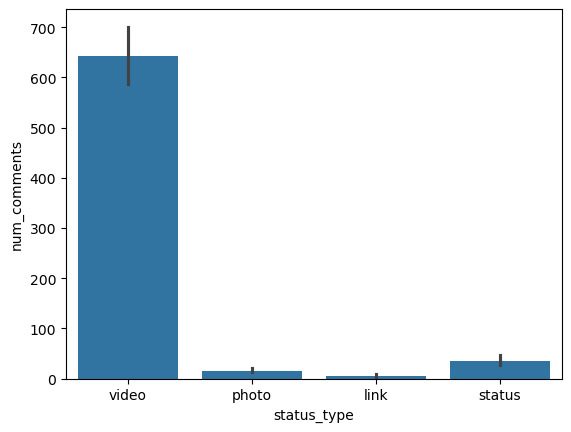

In [79]:
sns.barplot(x="status_type", y="num_comments", data=df)
plt.show()

In [48]:
# status_type="video" receive the maximum number of comments

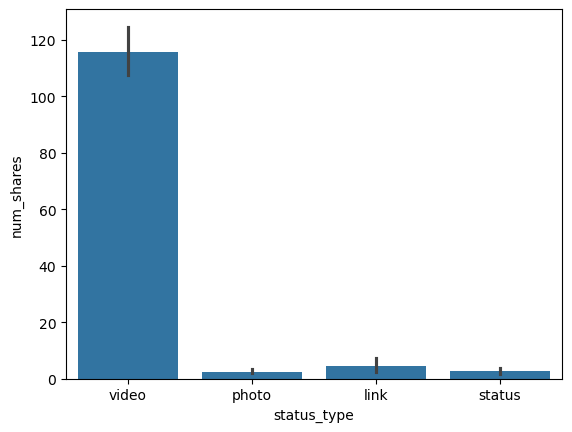

In [81]:
sns.barplot(x="status_type", y="num_shares", data=df)
plt.show()

In [50]:
# Video also receive the maximum number of shares

In [83]:
def categ_time(time):
    if time<=360:
        return "0-6"
    elif 360<time<=720:
        return "6-12"
    elif 720<time<1080:
        return "12-18"
    else:
        return "18-24"
df["time_categ"] = df["time"].apply(categ_time)

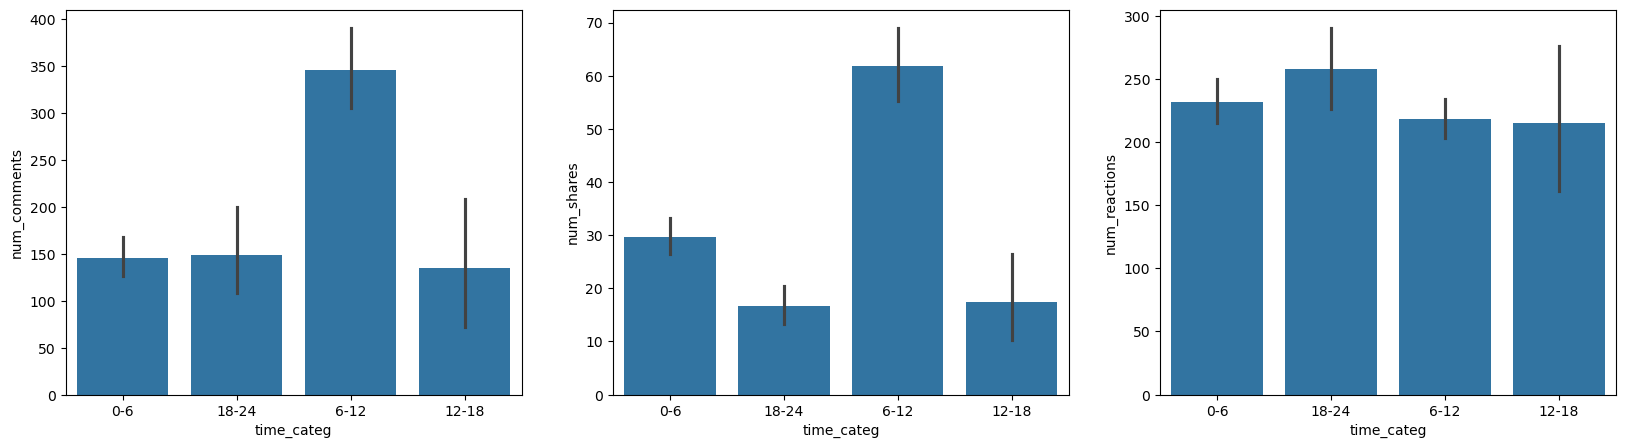

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
sns.barplot(x="time_categ", y="num_comments", data=df, ax=ax1)
sns.barplot(x="time_categ", y="num_shares", data=df, ax=ax2)
sns.barplot(x="time_categ", y="num_reactions", data=df, ax=ax3)
plt.show()

In [53]:
# We can observe that the sales posted between 6 AM and 12 PM receive the maximum number of comments and shares
# Whereas, num of reactions are almost equally distributed along the time, hence we can say that num_reactions are independent of time

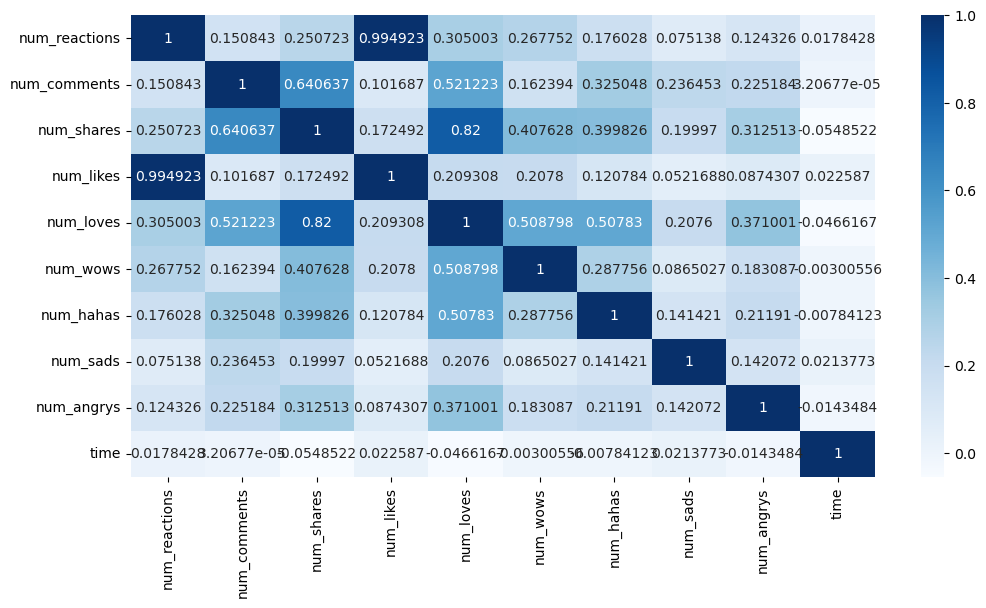

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt="g")
plt.show()

In [87]:
# num_likes and num_reactions have extremely high correlation. Hence, we will take num_likes for our model implementation.
# num_loves and num_shares have also significantly high correlation. Hence, we will only take num_share for model implementation

In [89]:
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time,time_categ
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018-04-22,360,0-6
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018-04-21,1365,18-24
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,2018-04-21,377,6-12
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,2018-04-21,149,0-6
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,2018-04-18,202,0-6


In [60]:
#We will drop the column status_id, date and time_categ for our model implementation

In [91]:
model_df = df.drop(["status_id", "date", "time_categ"], axis=1)

In [93]:
model_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,time
0,video,529,512,262,432,92,3,1,1,0,360
1,photo,150,0,0,150,0,0,0,0,0,1365
2,video,227,236,57,204,21,1,1,0,0,377
3,photo,111,0,0,111,0,0,0,0,0,149
4,photo,213,0,0,204,9,0,0,0,0,202


In [63]:
# We will also drop, num_reactions and num_loves because of their high correlation

In [95]:
model_df.drop(["num_reactions", "num_loves"], axis=1, inplace=True)

In [99]:
model_df.head()

,status_type,num_comments,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,time
0,video,512,262,432,3,1,1,0,360
1,photo,0,0,150,0,0,0,0,1365
2,video,236,57,204,1,1,0,0,377
3,photo,0,0,111,0,0,0,0,149
4,photo,0,0,204,0,0,0,0,202


In [101]:
model_df.drop("status_type", axis=1, inplace=True)

In [103]:
model_df.head(2)

,num_comments,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,time
0,512,262,432,3,1,1,0,360
1,0,0,150,0,0,0,0,1365


In [105]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()

In [109]:
model_df_scaled = scaler.fit_transform(model_df)

In [111]:
model_df_scaled

array([[ 0.32335035,  1.6868788 ,  0.48272661, ...,  0.47357035,
        -0.15574803, -0.33087918],
       [-0.25220622, -0.3041444 , -0.14472021, ..., -0.152587  ,
        -0.15574803,  2.09108466],
       [ 0.01308938,  0.12901714, -0.02457082, ..., -0.152587  ,
        -0.15574803, -0.28991064],
       ...,
       [-0.25220622, -0.3041444 , -0.47624353, ..., -0.152587  ,
        -0.15574803,  2.13446312],
       [-0.23871662, -0.13695924,  0.29805255, ..., -0.152587  ,
        -0.15574803, -1.094822  ],
       [-0.25220622, -0.3041444 , -0.44064371, ..., -0.152587  ,
        -0.15574803,  0.31979767]])

In [113]:
model_df.columns

Index(['num_comments', 'num_shares', 'num_likes', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'time'],
      dtype='object')

In [115]:
model_df_scaled = pd.DataFrame(model_df_scaled, columns= ['num_comments', 'num_shares', 'num_likes', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'time'])

In [117]:
model_df_scaled.head()

,num_comments,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,time
0,0.323350,1.686879,0.482727,0.196196,0.076713,0.473570,-0.155748,-0.330879
1,-0.252206,-0.304144,-0.144720,-0.147879,-0.176010,-0.152587,-0.155748,2.091085
2,0.013089,0.129017,-0.024571,-0.033187,0.076713,-0.152587,-0.155748,-0.289911
3,-0.252206,-0.304144,-0.231495,-0.147879,-0.176010,-0.152587,-0.155748,-0.839371
4,-0.252206,-0.304144,-0.024571,-0.147879,-0.176010,-0.152587,-0.155748,-0.711646


In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

[Text(0.5, 0, 'K'),
 Text(0, 0.5, 'Silhouette Coefficient'),
 Text(0.5, 1.0, 'Silhouette plot')]

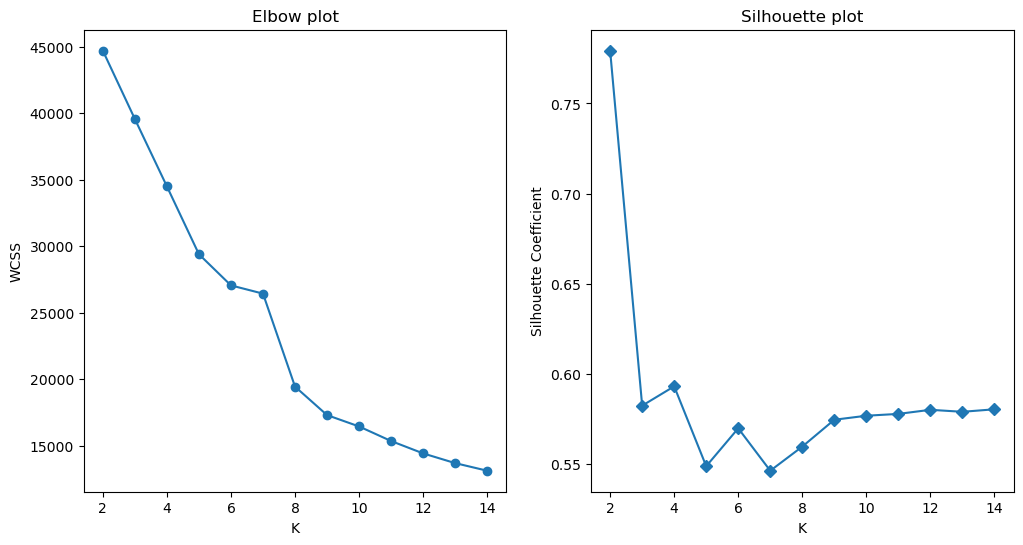

In [123]:
k_range = range(2,15)
sse = []
s_score = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(model_df_scaled)
    sse.append(kmeans.inertia_)

    labels = kmeans.labels_
    silhoutte_avg = silhouette_score(model_df_scaled, labels)
    s_score.append(silhoutte_avg)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.plot(k_range, sse, marker="o")
ax1.set(xlabel="K", ylabel="WCSS", title="Elbow plot")

ax2.plot(k_range, s_score, marker="D")
ax2.set(xlabel="K", ylabel="Silhouette Coefficient", title="Silhouette plot")

In [93]:
# From the elbow plot, we can observe the last drastic decline in WCSS value is from k=7 to k=8, hence k=8 should be the optimum clusters
# However, in silhouette plot, we can observe that the last drastic decline is from k=4, to k=5, hence k=5 should be the optimum clusters
# Since, we are varying insights from the eblow plot and the silhouette plot, we will implement the k values from both the plots and observe the model perfromance

## Implementing the model

In [125]:
kmeans = KMeans(n_clusters=8, init="k-means++", random_state=42)
y_pred = kmeans.fit_predict(model_df_scaled.values)

In [127]:
kmeans.labels_

array([0, 3, 0, ..., 3, 0, 0])

In [129]:
y_pred

array([0, 3, 0, ..., 3, 0, 0])

<Axes: xlabel='num_comments', ylabel='num_shares'>

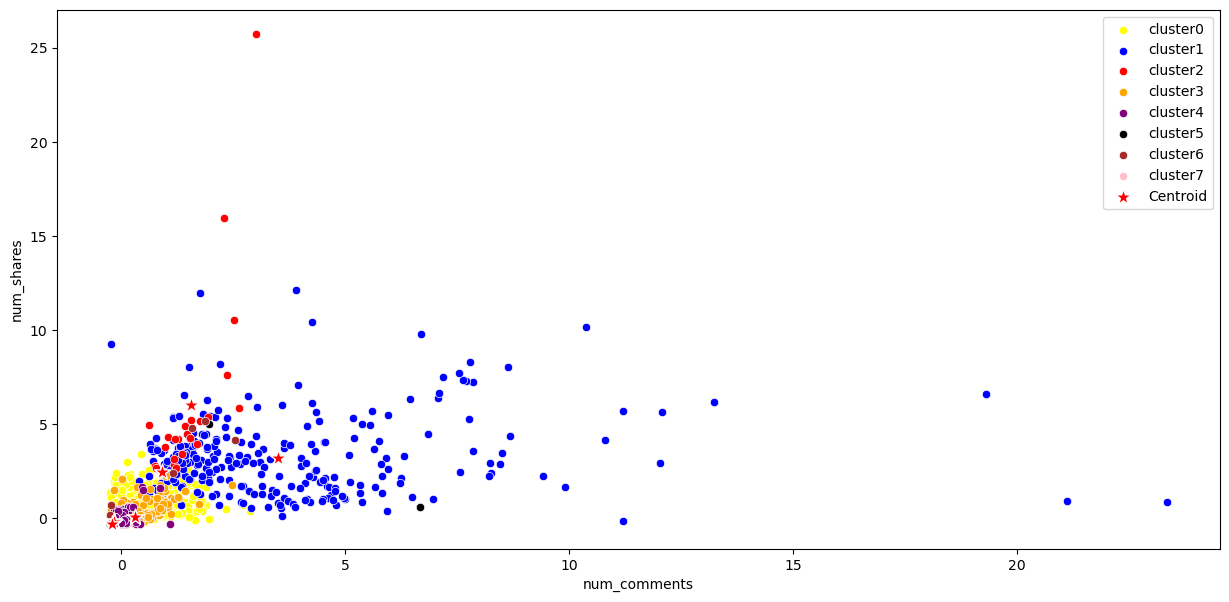

In [98]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==0], y=model_df_scaled['num_shares'][y_pred==0], color='yellow', label='cluster0')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==1], y=model_df_scaled['num_shares'][y_pred==1], color='blue', label='cluster1')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==2], y=model_df_scaled['num_shares'][y_pred==2], color="red", label='cluster2')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==3], y=model_df_scaled['num_shares'][y_pred==3], color='orange', label='cluster3')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==4], y=model_df_scaled['num_shares'][y_pred==4], color='purple', label='cluster4')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==5], y=model_df_scaled['num_shares'][y_pred==5], color='black', label='cluster5')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==6], y=model_df_scaled['num_shares'][y_pred==6], color='brown', label='cluster6')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==7], y=model_df_scaled['num_shares'][y_pred==7], color='pink', label='cluster7')
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color="red", marker="*", label="Centroid", s=150)

<Axes: xlabel='num_comments', ylabel='time'>

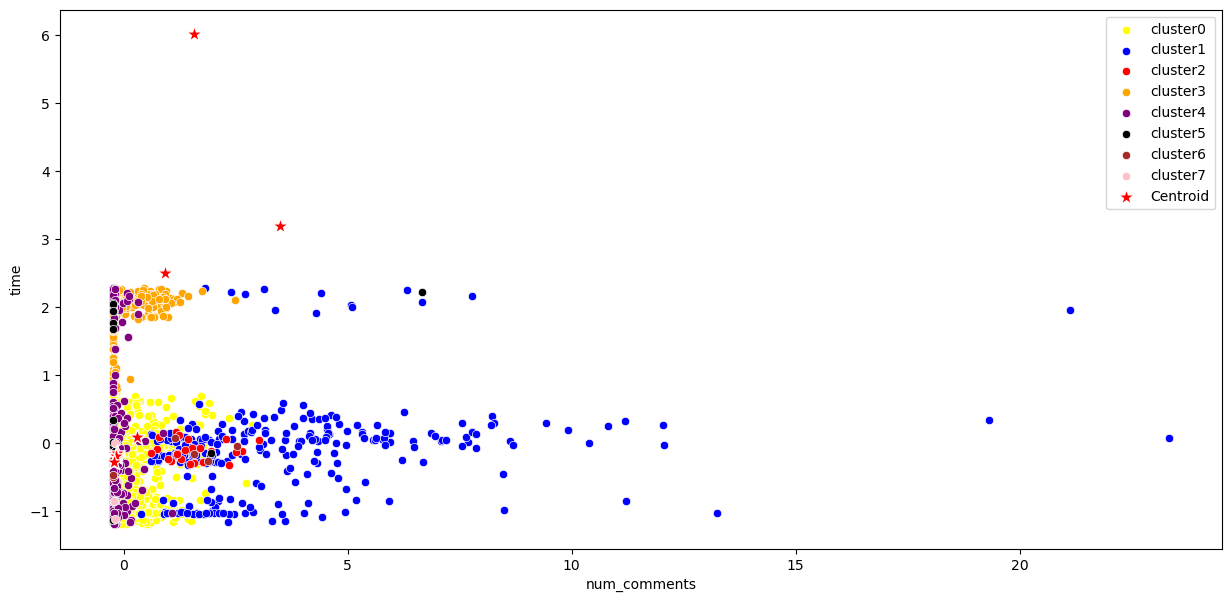

In [99]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==0], y=model_df_scaled['time'][y_pred==0], color='yellow', label='cluster0')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==1], y=model_df_scaled['time'][y_pred==1], color='blue', label='cluster1')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==2], y=model_df_scaled['time'][y_pred==2], color="red", label='cluster2')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==3], y=model_df_scaled['time'][y_pred==3], color='orange', label='cluster3')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==4], y=model_df_scaled['time'][y_pred==4], color='purple', label='cluster4')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==5], y=model_df_scaled['time'][y_pred==5], color='black', label='cluster5')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==6], y=model_df_scaled['time'][y_pred==6], color='brown', label='cluster6')
sns.scatterplot(x=model_df_scaled['num_comments'][y_pred==7], y=model_df_scaled['time'][y_pred==7], color='pink', label='cluster7')
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], color="red", marker="*", label="Centroid", s=150)

In [100]:
df["cluster"] = y_pred

In [101]:
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time,time_categ,cluster
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,2018-04-22,360,0-6,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,2018-04-21,1365,18-24,3
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,2018-04-21,377,6-12,0
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,2018-04-21,149,0-6,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,2018-04-18,202,0-6,0


In [102]:
df["cluster"].value_counts()

cluster
0    5324
3    1046
4     340
1     289
2      23
5      17
6       7
7       4
Name: count, dtype: int64

## 3D Plot

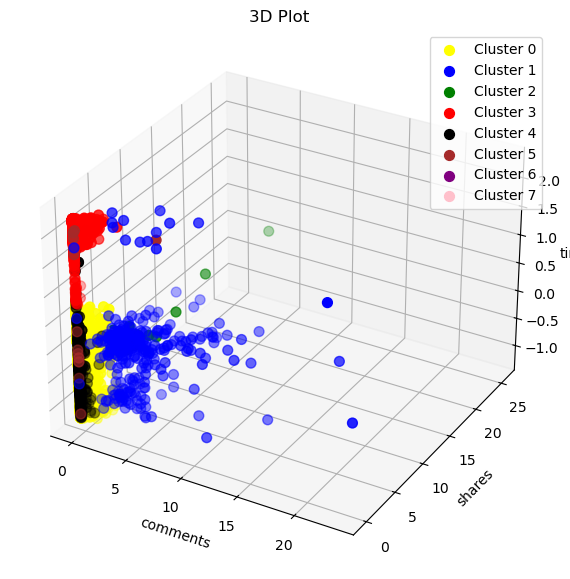

In [128]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['yellow', 'blue', 'green', 'red', 'black', 'brown', 'purple', 'pink']
for i in range(8):  
    ax.scatter(
        model_df_scaled.loc[y_pred == i, "num_comments"], 
        model_df_scaled.loc[y_pred == i, "num_shares"], 
        model_df_scaled.loc[y_pred == i, "time"], 
        color=colors[i], label=f'Cluster {i}', s=50
    )
ax.set(xlabel="comments", ylabel="shares", zlabel="time", title="3D Plot")
plt.legend()

In [130]:
y_pred

array([0, 3, 0, ..., 3, 0, 0])

In [132]:
model_df_scaled["cluster"] = y_pred

In [134]:
model_df_scaled["cluster"].value_counts()

cluster
0    5324
3    1046
4     340
1     289
2      23
5      17
6       7
7       4
Name: count, dtype: int64

## 8D parallel coordinates plot

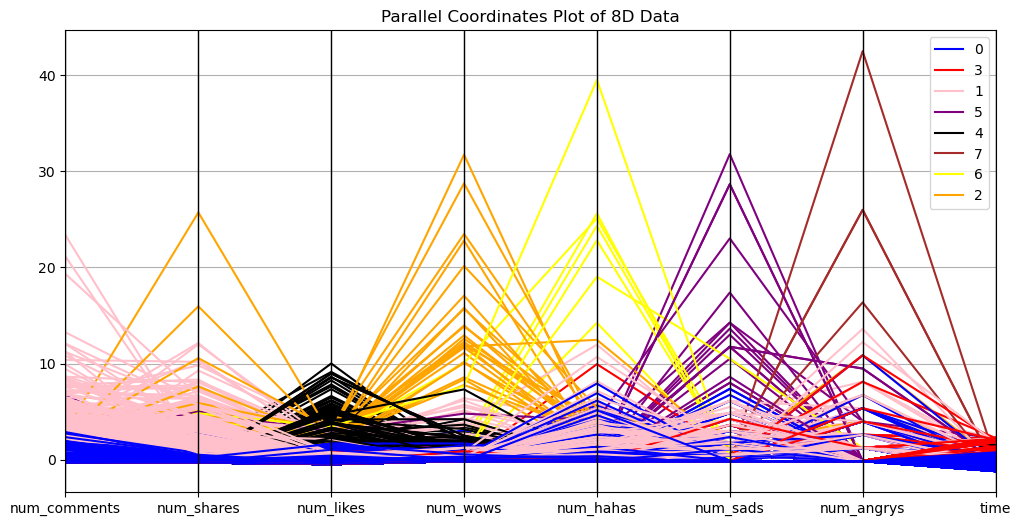

In [136]:
from pandas.plotting import parallel_coordinates

# Create a parallel coordinates plot for the clusters
plt.figure(figsize=(12, 6))
parallel_coordinates(model_df_scaled, class_column='cluster', color=['blue', 'red', "pink", "purple", "black", "brown", "yellow", "orange"])
plt.title('Parallel Coordinates Plot of 8D Data')
plt.show()

## Pair plots

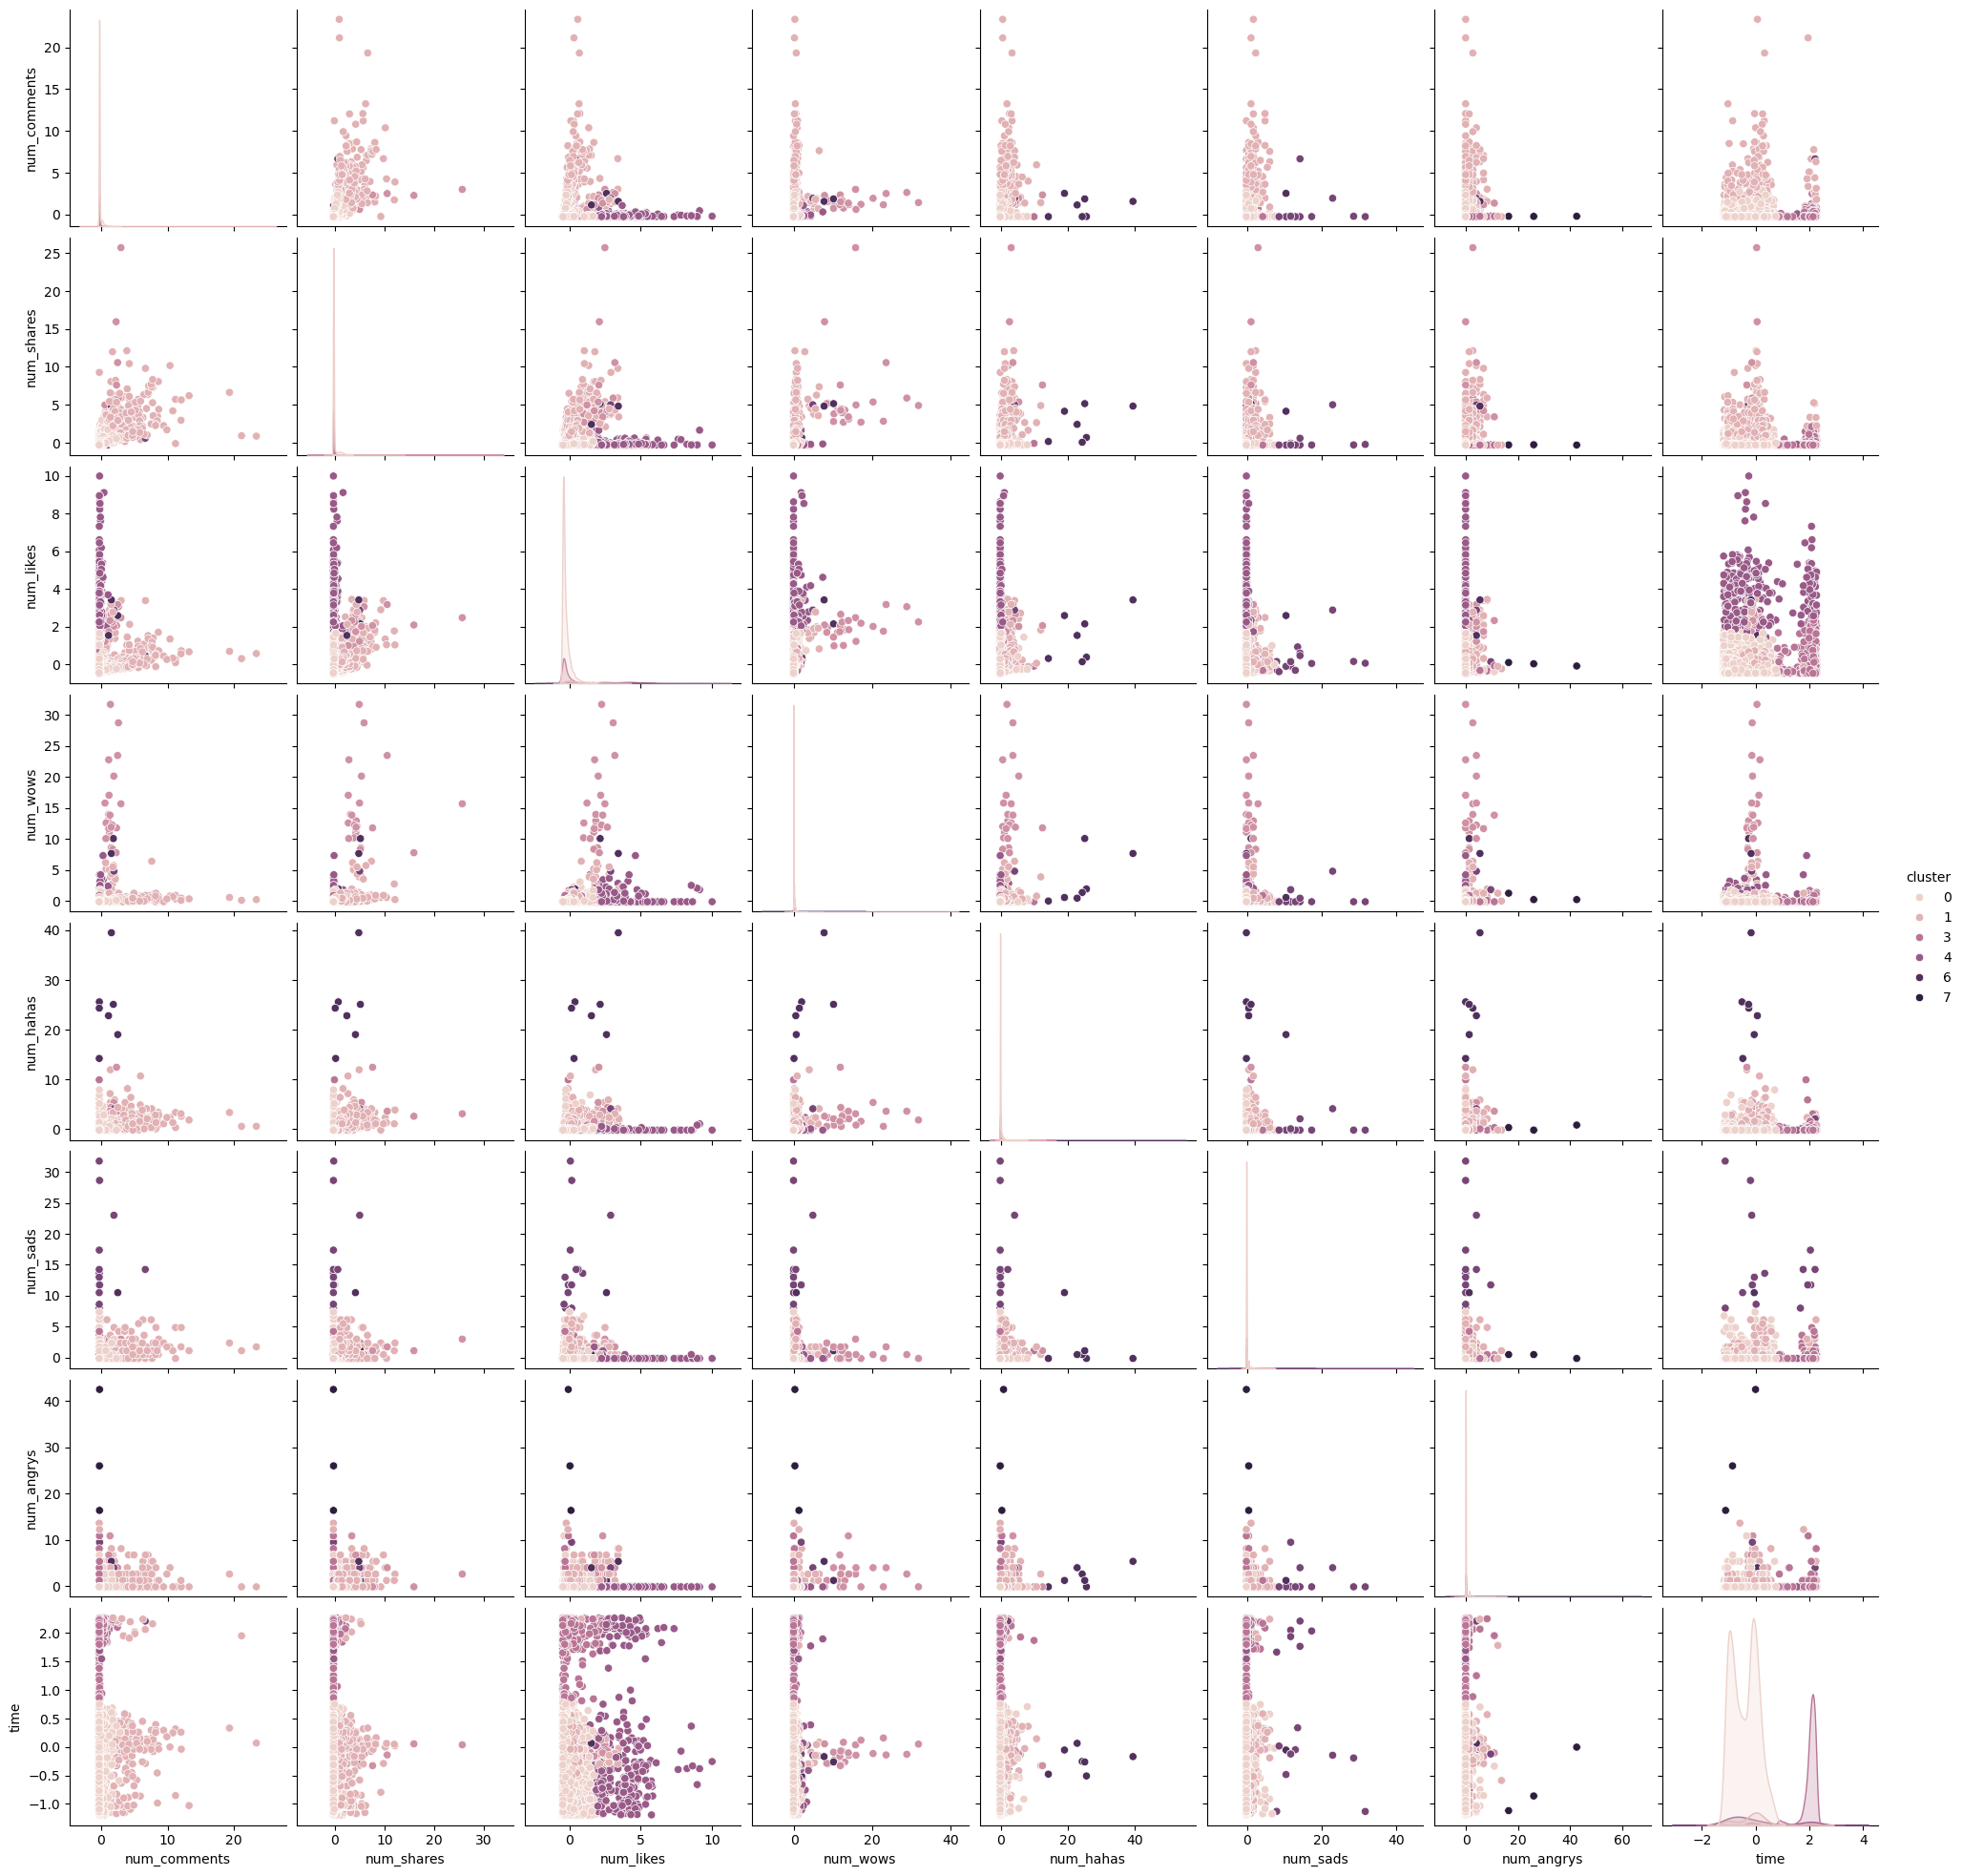

In [142]:
sns.pairplot(model_df_scaled, hue='cluster', diag_kind='kde')
plt.show()

## Quiz

In [153]:
df = pd.read_csv("Live.csv")

In [157]:
df.drop(["Column1", "Column2", "Column3", "Column4"], axis=1, inplace=True)
df[["date", "time"]] = df["status_published"].str.split(" ", expand=True)
df["date"] = pd.to_datetime(df["date"])

In [159]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2018-04-22,6:00
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,2018-04-21,22:45
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,2018-04-21,6:17
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,2018-04-21,2:29
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2018-04-18,3:22


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   object        
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
 12  date              7050 non-null   datetime64[ns]
 13  time              7050 non-null   object        
dtypes: datetime64[ns](1), in

**1. 1) How many columns contain null data?**

**A. 0, B. 3, C. 4, D. 5**

**Answer is C. 4**

**2) How many status ids are unique?**

**A. 3984, B.4509, C.6503, D.6997**

In [155]:
df["status_id"].nunique()

6997

**Answer is D**

**3) How many video post has been made for live selling:**

**A. 4288, B.493, C.293, D.2334**

In [163]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'date', 'time'],
      dtype='object')

In [154]:
df["status_type"].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

**Answer is D**

**4) How many likes have been given to the photo posted on 4/19/2018 at 22:26?**

**A. 359, B.493, C.293, D.379**

In [169]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2018-04-22,6:00
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,2018-04-21,22:45
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,2018-04-21,6:17
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,2018-04-21,2:29
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2018-04-18,3:22


In [165]:
df["num_likes"][(df["date"]=="2018-04-19") & (df["time"]=="22:26")]

4592    379
Name: num_likes, dtype: int64

In [175]:
df[(df["date"]=="2018-04-19") & (df["time"]=="22:26")]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,date,time
4592,725980084255106_850951205091326,photo,4/19/2018 22:26,383,5,6,379,2,2,0,0,0,2018-04-19,22:26


**Answer is D. 379**

**5) How many total shares were made for the video post that was posted on 7/15/2017 at 10:52?**

**A.139, B.167, C.153, D.173**

In [167]:
df["num_shares"][(df["date"]=="2017-07-15") & (df["time"]=="10:52")]

6977    167
Name: num_shares, dtype: int64

**Answer is B: 167**

**6) What does k means do?**

**A. Finds probability of elements**

**B. Finds relationships between dependent and independent data**

**C. None of the above**

**D. Group similar elements**

**Answer is D**

**7) What output will the below code give?  colour=['red','blue','green','yellow','cyan']  n=0  for i in range(0,len(colour)):**

**plt.scatter(X[df['Clusters(5)']==i],Y[df['Clusters(5)']==i],s=10,c=colour[i]) plt.scatter(k.cluster_centers_[:,0] ,k.cluster_centers_[:,1], color='black')**

**A. Gives 5 clusters**

**B. Gives 2 clusters**

**C. Gives 3 clusters**

**D. Gives 5 clusters with midpoints**

**Answer is D**

**8) Which method is used to decide the optimal number of clusters in k-means clustering?**

**A. Evaluation Method**

**B. None**

**C. Append method**

**D. Elbow method**

**Answer is D**

**9) In what cases is K Means used?**

**A. Regression**

**B. Classificatiton**

**C. Clustering**

**D. None of the above**

**Answer is C**

**10) For exploration, do we use Hierarchical Clustering? True or False**

**Answer is True**

**11) Which is the function used for the K Means?**

**A. None of the above**

**B. Heatmap**

**C. Clusters**

**D. KMeans**

**Answer is KMeans**

**12) How to train the K-means model?**

**A. train(), B. fit(), C. train_test_split(), D. predict()**

**Answer is fit()**

**13) What does random_state do?**

**A. All of the above.**

**B. Used to split data**

**C. Checks and validate data when code is run multiple times.**

**D. Show states**

**Answer is C**

**14) How to check which data is placed under which Cluster?**

**A. None of the above, B. cluster_, C. Inertia_, D. Labels_**

**Answer is D**

**15) Why do we perform standard scalar?**

**A. Standardizing the data**

**B. None of the above**

**C. Removing the standard values**

**D. Adding standard values**

**Answer is A**

**16) Perform the following operations on the dataset:**

**Drop Status id and status published column. Use a label encoder to encode the status type column. Standardize the data using min-max scalar. Create a K means model for 2 clusters.**

**From the above model, what is the inter-cluster variance of the model?**

**A.345 to 350, B.284 to 290, C.210 to 220, D. 235 to 240**

In [205]:
df = pd.read_csv("Live.csv")

In [207]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [209]:
df.drop(["status_id", "status_published", "Column1", "Column2", "Column3", "Column4"], axis=1, inplace=True)

In [211]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [213]:
from sklearn.preprocessing import LabelEncoder

In [215]:
encoder = LabelEncoder()
df_encoded = encoder.fit_transform(df["status_type"])

In [217]:
df_encoded

array([3, 1, 3, ..., 1, 1, 1])

In [219]:
encoded_df = df

In [221]:
encoded_df["status_type"] = df_encoded

In [223]:
encoded_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [225]:
from sklearn.preprocessing import MinMaxScaler

In [227]:
scaler = MinMaxScaler()

In [229]:
scaled_encoded_df = scaler.fit_transform(encoded_df)

In [231]:
scaled_encoded_df

array([[1.00000000e+00, 1.12314225e-01, 2.43925679e-02, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [3.33333333e-01, 3.18471338e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.81953291e-02, 1.12434493e-02, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 4.24628450e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 7.45222930e-02, 5.71700810e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 3.60934183e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [233]:
encoded_df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [235]:
scaled_encoded_df = pd.DataFrame(scaled_encoded_df, columns=['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'])

In [237]:
scaled_encoded_df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [251]:
kmeans = KMeans(n_clusters=2, random_state=70)
kmeans.fit(scaled_encoded_df.values)

centers = kmeans.cluster_centers_
overall_mean = np.mean(scaled_encoded_df.values, axis=0)
cluster_sizes = np.bincount(kmeans.labels_)
squared_distances = np.sum((centers - overall_mean) ** 2, axis=1)
inter_cluster_variance = np.sum(cluster_sizes * squared_distances)
print(inter_cluster_variance)

658.4455798259391


In [253]:
print(squared_distances)

[0.05085636 0.17183589]


In [255]:
print(cluster_sizes)

[4571 2479]


In [257]:
print(centers)

[[3.44429844e-01 3.79264535e-02 7.41055384e-04 7.30204150e-04
  3.74121751e-02 2.11643069e-03 2.35317659e-03 1.18293340e-03
  2.85142528e-03 1.40590338e-03]
 [9.79871176e-01 6.89495574e-02 2.89741338e-02 3.18325837e-02
  6.08115292e-02 5.10959639e-02 8.83785725e-03 1.04157051e-02
  8.31991412e-03 7.77881668e-03]]


In [259]:
print(overall_mean)

[0.56832151 0.04885715 0.01068871 0.01168883 0.04565671 0.0193739
 0.00463799 0.00443601 0.00477819 0.00365134]
